# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [20]:
# import numpy and pandas
import pandas as pd
import numpy as np


from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [7]:
# Your code here:

salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [8]:
# Your code here:
salaries.head()


Name                              Job Titles  \
0    AARON,  JEFFERY M                                SERGEANT   
1      AARON,  KARINA   POLICE OFFICER (ASSIGNED AS DETECTIVE)   
2  AARON,  KIMBERLEI R                CHIEF CONTRACT EXPEDITER   
3  ABAD JR,  VICENTE M                       CIVIL ENGINEER IV   
4    ABASCAL,  REECE E             TRAFFIC CONTROL AIDE-HOURLY   

         Department Full or Part-Time Salary or Hourly  Typical Hours  \
0            POLICE                 F           Salary            NaN   
1            POLICE                 F           Salary            NaN   
2  GENERAL SERVICES                 F           Salary            NaN   
3       WATER MGMNT                 F           Salary            NaN   
4              OEMC                 P           Hourly           20.0   

   Annual Salary  Hourly Rate  
0       101442.0          NaN  
1        94122.0          NaN  
2       101592.0          NaN  
3       110064.0          NaN  
4            NaN        19.86

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [3]:
# Your code here:

salaries.info()

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [4]:
# Your code here:

employment_counts = salaries['Salary or Hourly'].value_counts()
employment_counts

In [12]:
salaries_annual = salaries[salaries['Salary or Hourly'] == 'Salary']
salaries_hourly = salaries[salaries['Salary or Hourly'] == 'Hourly']

<Axes: >

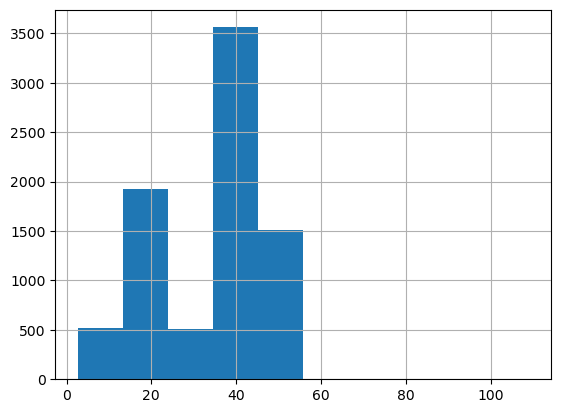

In [13]:
salaries_hourly["Hourly Rate"].hist()

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [5]:
salaries.head()

In [ ]:
salaries

In [ ]:
salaries.groupby("Deparment").count()["Name"] #Me devuelve una serie

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [6]:
# Your code here:

# H0: u == 30$/h   (banco de pruebas)
# H1: u != 30$/h   (la que doy por buena)

# alpha = 1 - 0.95 (95%) => 0.05

#Mirar la media del dataset y está por encima. Ver la media grande de lo que tenemos respecto a la otra y efectivamente estaba mal la definición

In [14]:
#Test parameters

hypothesis_mean = 30
sample_mean = salaries_hourly['Hourly Rate'].mean()
print(sample_mean)

32.78855771628024


In [10]:
alpha = 0.05

In [21]:
zscore, pvalue = ztest(salaries_hourly["Hourly Rate"], value = hypothesis_mean)

In [22]:
zscore

20.6198057854942

In [23]:
pvalue

1.8228873859286195e-94

In [ ]:
#Ya tengo mi distribución sin normalizar con la media de 30, un p-valor 

Se rechaza la hipotesis nula

In [ ]:
t_value, p_value = stats.ttest_1samp(salaries_hourly['Hourly Rate'], popmean = hypothesis_mean)

In [ ]:
print(f't_value: {t_value}', f'\np-value: {p_value}')

if p_value < alpha:
    print("The hourly wage of all hourly workers is significantly different from $30/hr")
else:
    print("The hourly wage of all hourly workers")

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [8]:
# Your code here:

# H0: u < $86000/year   (banco de pruebas)
# H1: u >= $86000/year   (la que doy por buena)

# alpha = 1 - 0.95 (95%) => 0.05


In [24]:
salaries_annual_police_df = salaries_annual[salaries_annual["Department"] == "POLICE"]

In [25]:
salaries_annual_police_df["Annual Salary"].mean()

86486.41450313339

In [26]:
hypothesis_mean = 8600
sample_mean = salaries_annual_police_df["Annual Salary"].mean()
print(sample_mean)

86486.41450313339


In [27]:
zscore, pvalue = ztest(salaries_annual_police_df["Annual Salary"], value = hypothesis_mean)

In [28]:
zscore

493.5002857399385

Using the `crosstab` function, find the department that has the most hourly workers. 

In [29]:
pvalue

0.0

In [9]:
# Your code here:



The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [10]:
# Your code here:



# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [11]:
# Your code here:

# Intervalo de confianza: Cuando calculas una media, tú puedes afirmar que la media del salario son 30 dolares la hora, y el intervalo de confianza
# por la derecha o por la izquierda tiene un error asociado. Damos el valor que hemos calculado +- el error asociado. 

In [30]:
# Calculate mean and standard deviation

mean = np.mean(salaries_hourly['Hourly Rate'])
std = np.std(salaries_hourly['Hourly Rate'], ddof = 0)

In [31]:
mean

32.78855771628024

In [32]:
std

12.111817701093837

In [33]:
#calculate standard error of the mean
sem = std /np.sqrt(len(salaries_hourly['Hourly Rate']))

In [34]:
sem

0.13522842712401323

In [35]:
sem = stats.sem(salaries_hourly['Hourly Rate'], axis = None, ddof = 0)

In [36]:
sem

0.1352284271240131

In [37]:
# set significance level and degrees of freedom
alpha = 0.05
len_df = len(salaries_hourly['Hourly Rate']) - 1

In [38]:
# calculate confidence interval
ci = t.interval(1-alpha, len_df, loc = mean, scale = sem)
print('The 95% confidence interval for the hourly wage is:', ci)

NameError: name 't' is not defined

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [12]:
# Your code here:



# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [13]:
# Your code here:

